In [1]:
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import numpy as np

In [2]:
'''
RULES:

if NUM_PIECES is 'HIGH' then 'opening'
if NUM_PIECES is 'MEDIUM' then 'middlegame'
if NUM_PIECES is 'LOW' then 'endgame'


if NUM_MOVES <= 20 then 'opening'
if NUM_MOVES > 20 and NUM_MOVES <= 40 then 'middlegame'
if NUM_MOVES > 40 then 'endgame'

if BLACK_KING_FILE is 'advanced' AND WHITE_KING_FILE is 'advanced' then 'endgame'
if BLACK_KING_FILE is 'advanced' XOR WHITE_KING_FILE is 'advanced' then 'middlegame'
if BLACK_KING_FILE is not 'advanced' AND WHITE_KING_FILE is note 'advanced' then 'opening'
'''

"\nRULES:\n\nif NUM_PIECES is 'HIGH' then 'opening'\nif NUM_PIECES is 'MEDIUM' then 'middlegame'\nif NUM_PIECES is 'LOW' then 'endgame'\n\n\nif NUM_MOVES <= 20 then 'opening'\nif NUM_MOVES > 20 and NUM_MOVES <= 40 then 'middlegame'\nif NUM_MOVES > 40 then 'endgame'\n\nif BLACK_KING_FILE is 'advanced' AND WHITE_KING_FILE is 'advanced' then 'endgame'\nif BLACK_KING_FILE is 'advanced' XOR WHITE_KING_FILE is 'advanced' then 'middlegame'\nif BLACK_KING_FILE is not 'advanced' AND WHITE_KING_FILE is note 'advanced' then 'opening'\n"

In [38]:
# Create fuzzy variables
num_pieces = ctrl.Antecedent(np.arange(2, 33, 1), 'num_pieces')
num_moves = ctrl.Antecedent(np.arange(0, 150, 1), 'num_moves')
king_advanced_squares = ctrl.Antecedent(np.arange(1,9,1), 'king_advanced_squares')
game_phase = ctrl.Consequent(np.linspace(0, 1, 50), 'game_phase')

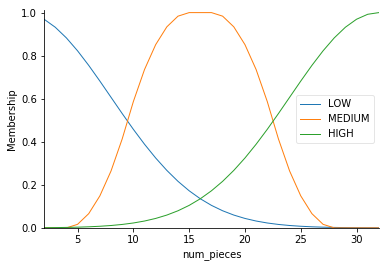

In [39]:
# Populate the fuzzy variables with membership functions
num_pieces['LOW'] = fuzz.gaussmf(num_pieces.universe, 0, 8)
num_pieces['MEDIUM'] = fuzz.pimf(num_pieces.universe, 4, 15, 17, 28)
num_pieces['HIGH'] = fuzz.gaussmf(num_pieces.universe, 32, 8)
num_pieces.view()

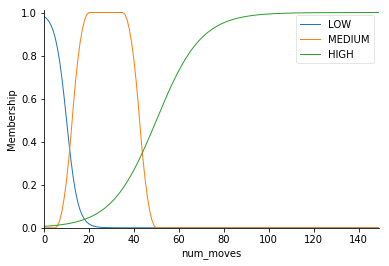

In [43]:
num_moves['LOW'] = fuzz.sigmf(num_moves.universe, 10, -.4)
num_moves['MEDIUM'] = fuzz.pimf(num_moves.universe, 5, 20, 35, 50)
num_moves['HIGH'] = fuzz.sigmf(num_moves.universe, 50, .1)
num_moves.view()

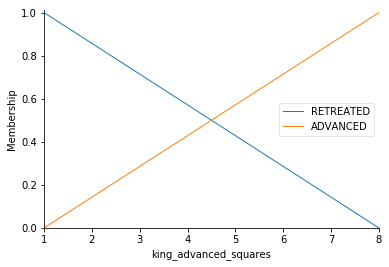

In [41]:
king_advanced_squares['RETREATED'] = fuzz.trimf(king_advanced_squares.universe, [1,1,8])
king_advanced_squares['ADVANCED'] = fuzz.trimf(king_advanced_squares.universe, [1,8,8])
king_advanced_squares.view()